In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('Associate_Case Study 1.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
# Data Cleaning
# Check for missing values
df.isnull().sum()

# Fill missing values or drop rows with missing values
# Example: Filling missing values with median for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Example: Filling missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [5]:
df1 = df.copy() ## saving a Copy

In [6]:
## Labeling Survival rate as Not Survived and Survived
df['survived'] = df['survived'].replace({0: 'Not Survived', 1: 'Survived'})

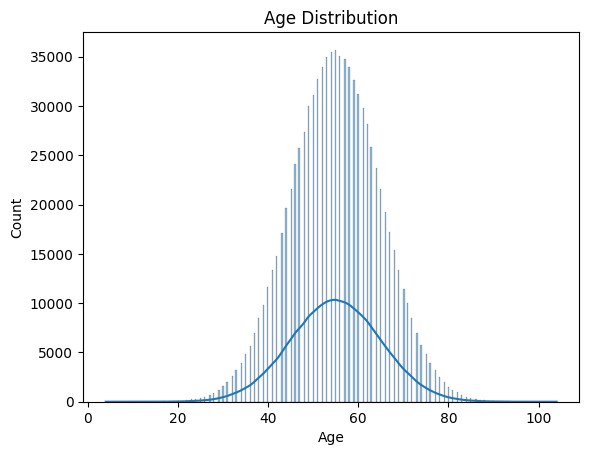

In [7]:
# Visualize the distribution of age (using original data)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

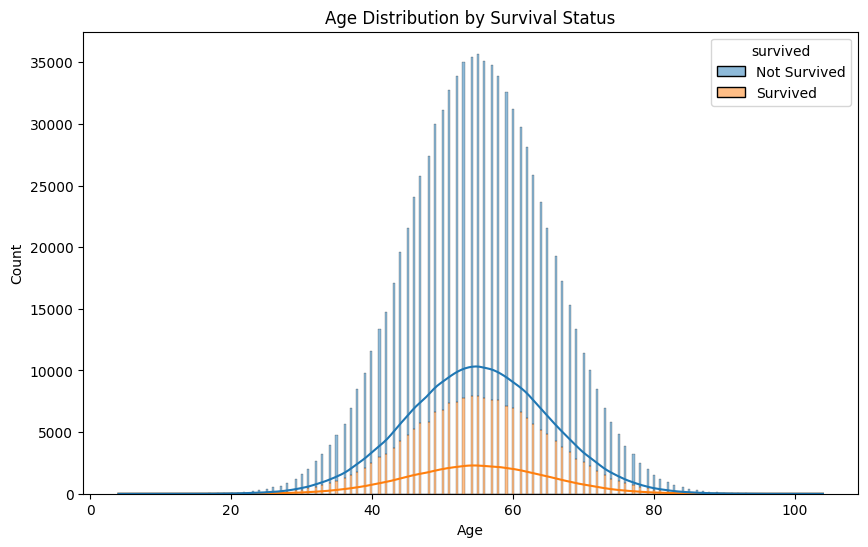

In [8]:
# Additional Visualizations

# Age Distribution by Survival Status (using original data)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

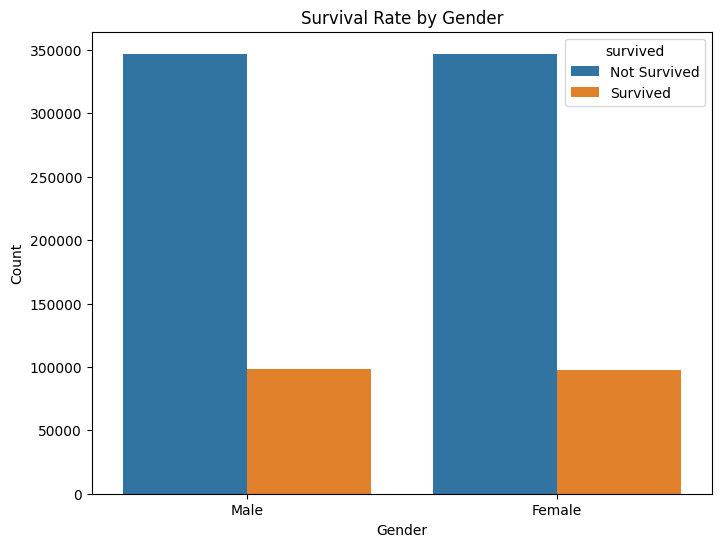

In [9]:
# Survival Rate by Gender
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gender', hue='survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

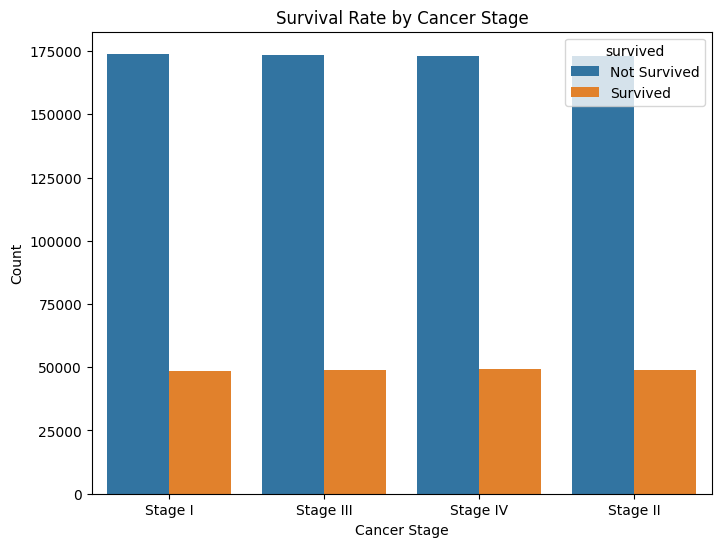

In [10]:
# Survival Rate by Cancer Stage
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='cancer_stage', hue='survived')
plt.title('Survival Rate by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()

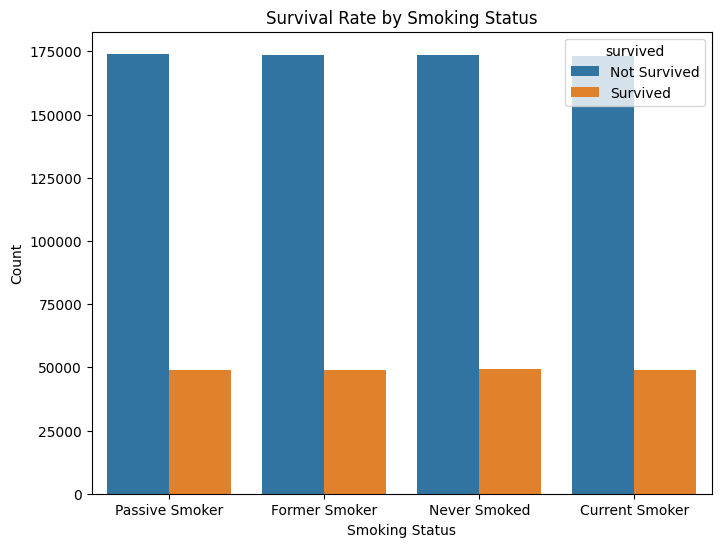

In [11]:
# Survival Rate by Smoking Status
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='smoking_status', hue='survived')
plt.title('Survival Rate by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

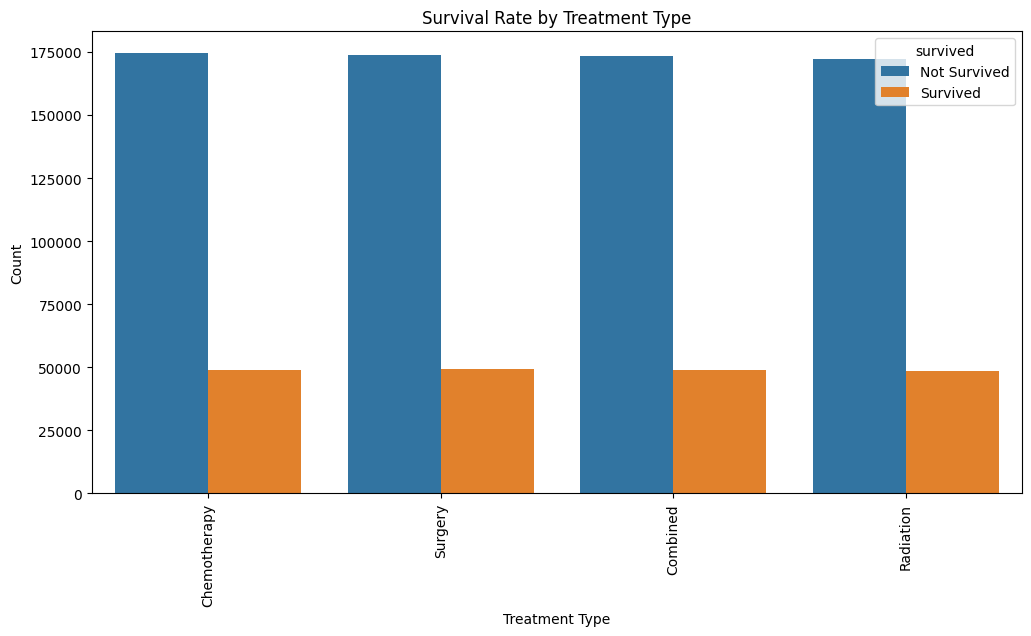

In [12]:
# Survival Rate by Treatment Type
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='treatment_type', hue='survived')
plt.title('Survival Rate by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

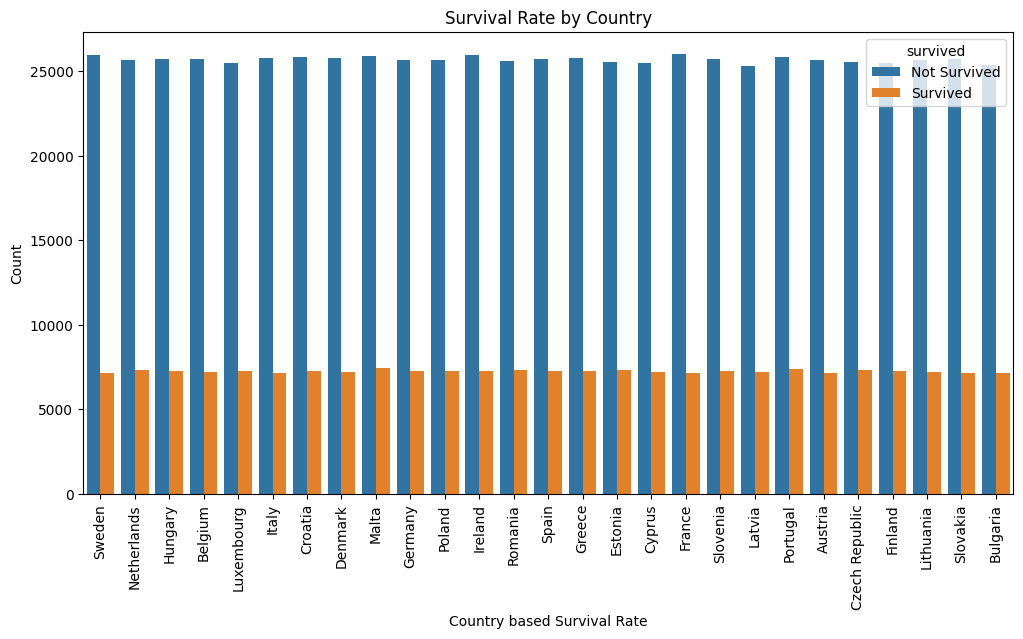

In [13]:
# Survival Rate by Treatment Type
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='country', hue='survived')
plt.title('Survival Rate by Country')
plt.xlabel('Country based Survival Rate')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

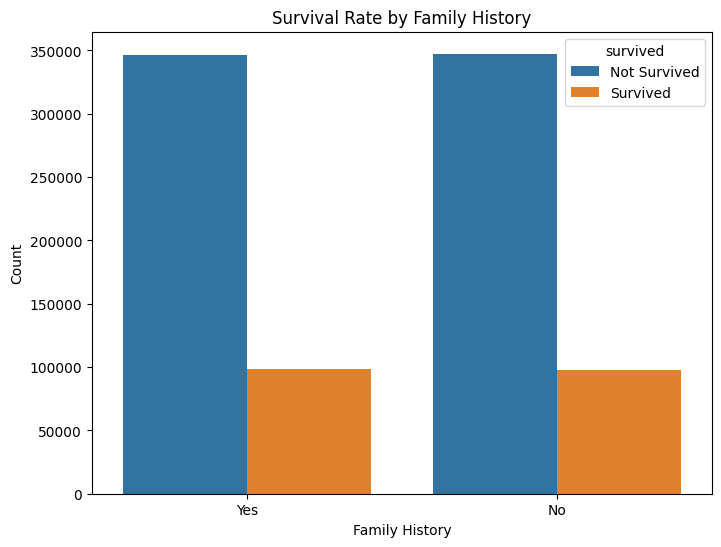

In [14]:
# Survival Rate by Family History
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='family_history', hue='survived')
plt.title('Survival Rate by Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

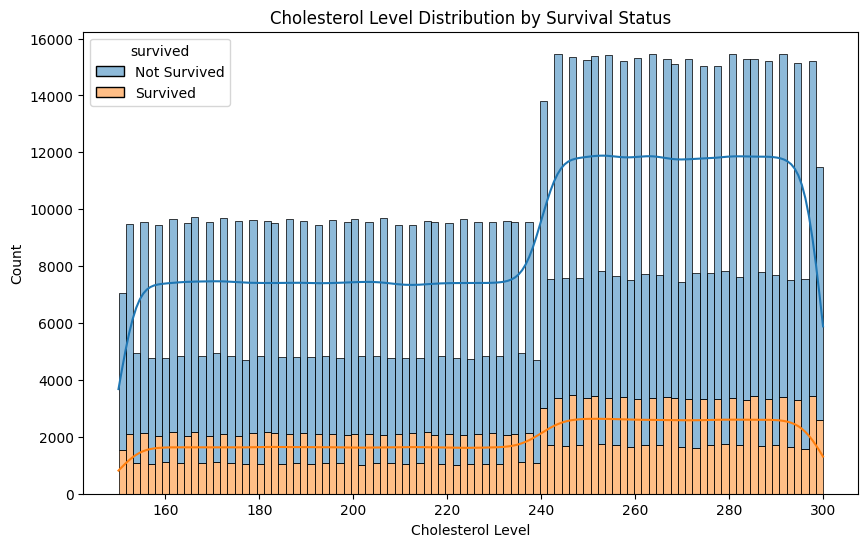

In [15]:
# Cholesterol Level Distribution by Survival Status (using original data)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='cholesterol_level', hue='survived', multiple='stack', kde=True)
plt.title('Cholesterol Level Distribution by Survival Status')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

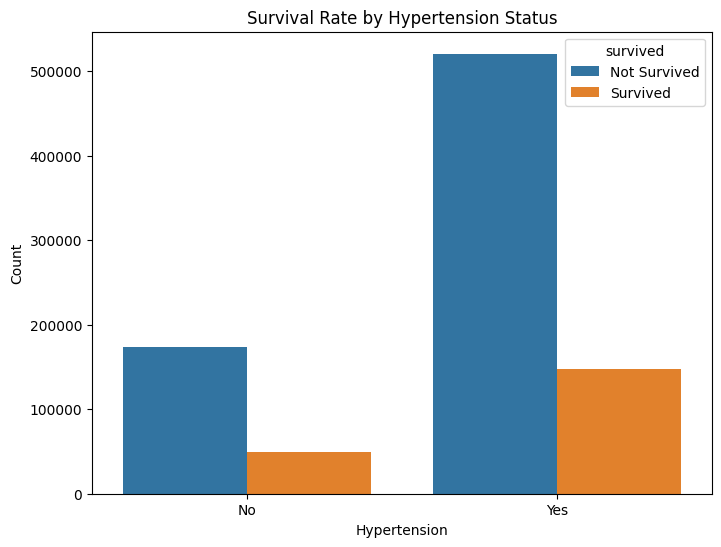

In [16]:
# Survival Rate by Hypertension Status
df['hypertension'] = df['hypertension'].replace({0: 'No', 1: 'Yes'})
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='hypertension', hue='survived')
plt.title('Survival Rate by Hypertension Status')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

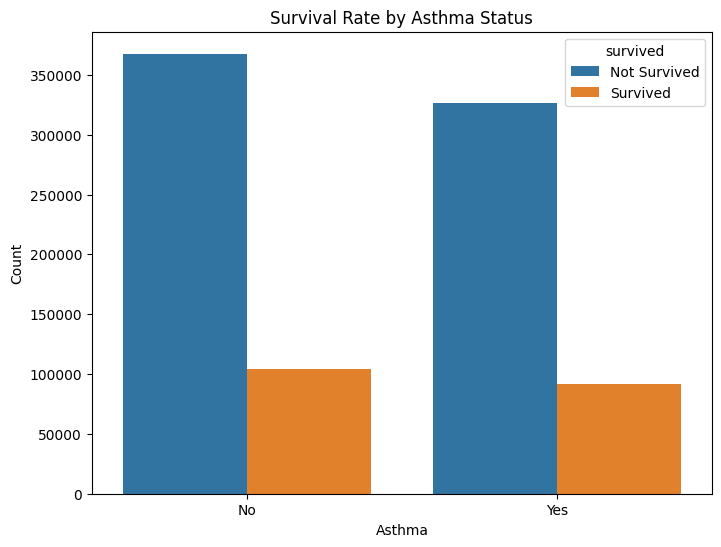

In [17]:
# Survival Rate by Asthma Status
df['asthma'] = df['asthma'].replace({0: 'No', 1: 'Yes'})
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='asthma', hue='survived')
plt.title('Survival Rate by Asthma Status')
plt.xlabel('Asthma')
plt.ylabel('Count')
plt.show()

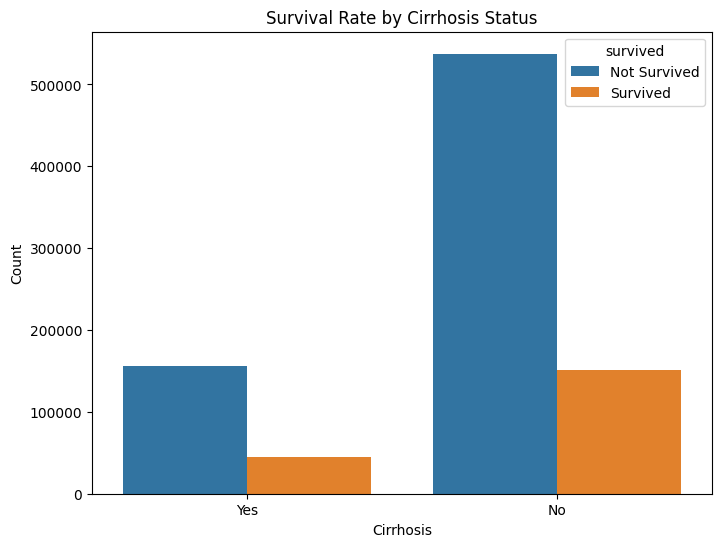

In [18]:
# Survival Rate by Cirrhosis Status
df['cirrhosis'] = df['cirrhosis'].replace({0: 'No', 1: 'Yes'})
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='cirrhosis', hue='survived')
plt.title('Survival Rate by Cirrhosis Status')
plt.xlabel('Cirrhosis')
plt.ylabel('Count')
plt.show()

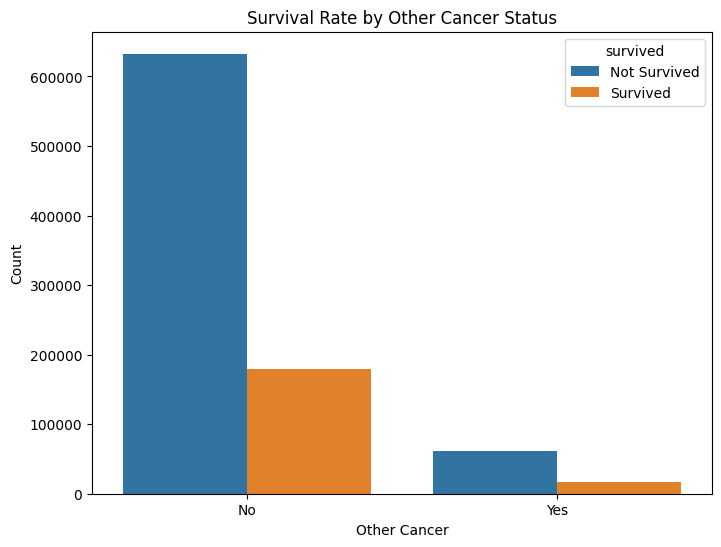

In [19]:
# Survival Rate by Other Cancer Status
df['other_cancer'] = df['other_cancer'].replace({0: 'No', 1: 'Yes'})
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='other_cancer', hue='survived')
plt.title('Survival Rate by Other Cancer Status')
plt.xlabel('Other Cancer')
plt.ylabel('Count')
plt.show()

In [20]:
# Convert categorical variables to numeric
le = LabelEncoder()
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

# Normalize/standardize numerical features for model building
scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

# Create a mapping dictionary for countries
country_mapping = dict(enumerate(le.classes_))

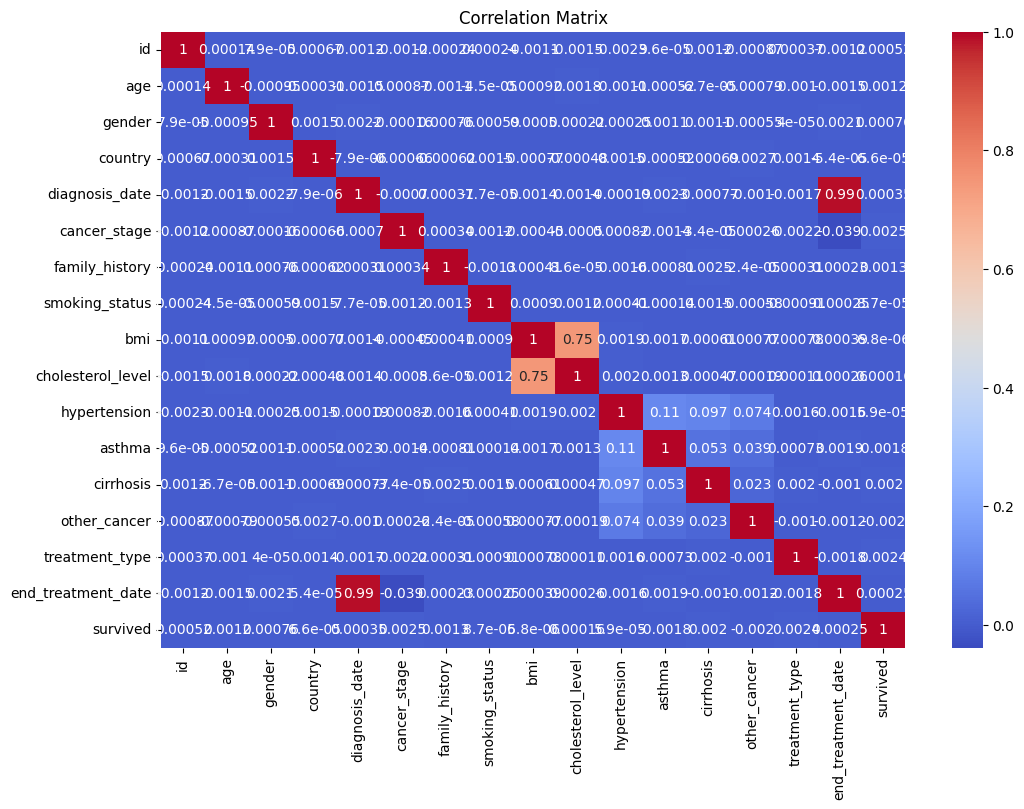

In [21]:
# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
## ML MODEL DEVELOPMENT
# Load the dataset
df = pd.read_csv('Associate_Case Study 1.csv')

# Data Cleaning
# Check for missing values
df.isnull().sum()

# Fill missing values or drop rows with missing values
# Example: Filling missing values with median for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Example: Filling missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Convert categorical variables to numeric
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Normalize/standardize numerical features for model building
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Ensure 'survived' is treated as a categorical variable
df['survived'] = df['survived'].astype(int)

# Check the unique values in the 'survived' column
print(df['survived'].unique())

# Model Building
# Split the data into training and testing sets
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[0 1]
Accuracy: 0.7789625468164794
Confusion Matrix:
 [[207980      4]
 [ 59013      3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    207984
           1       0.43      0.00      0.00     59016

    accuracy                           0.78    267000
   macro avg       0.60      0.50      0.44    267000
weighted avg       0.70      0.78      0.68    267000

